In this notebook, we review material from previous lectures:

* [ggplot](#ggplot)
    * aesthetics
    * geometries
    * faceting
    * statistical transformations
    * position adjustments
    * coordinate transformations
* [dplyr verbs](#dplyr-verbs)
    * filter
    * arrange
    * select
    * rename
    * mutate
    * transmute
    * group_by
    * summarize
* [pipes](#pipes)
* [EDA](#EDA)
    * visualizing distributions
    * typical values
    * unusual values
    * missing values
    * covariation

# ggplot

In [1]:
options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


What's wrong with this code to produce a scatter plot of `hwy` vs `displ` with the `color` aesthetic mapped to `drv`?

In [2]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), color = drv)

ERROR: Error in layer(data = data, mapping = mapping, stat = stat, geom = GeomPoint, : object 'drv' not found


What does `se = FALSE` do in the code below?

`geom_smooth()` using method = 'loess'


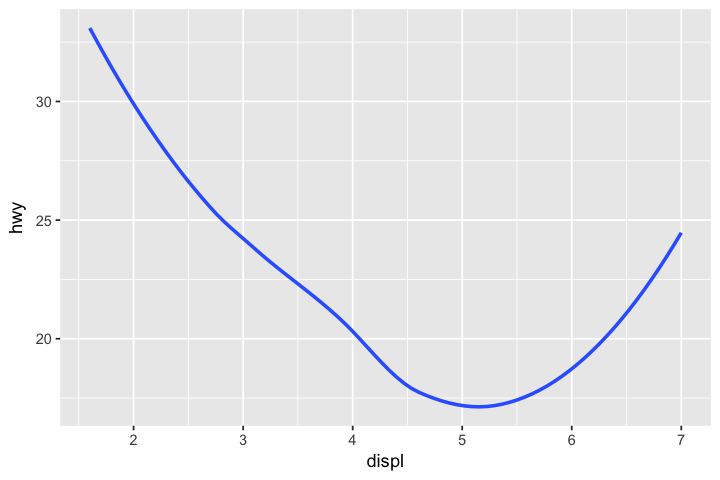

In [3]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy), se = FALSE)

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot1.png)

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot2.png)

Match the geometries below with their statistical transformations.

| Geometry       | Stat     |
|----------------|----------|
| geom_point     | bin      |
| geom_histogram | count    |
| geom_bar       | identity |

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot3.png)

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot4.png)

# dplyr verbs

What's wrong in the code fragments below?

In [4]:
filter(mpg, drv == f) # find vehicles with front wheel drive

ERROR: Error in filter_impl(.data, dots): object 'f' not found


In [5]:
filter(mpg, drv <> '4')) # find vehicles that do not have 4 wheel drives

ERROR: Error in parse(text = x, srcfile = src): <text>:1:18: unexpected '>'
1: filter(mpg, drv <>
                     ^


In [6]:
filter(mpg, manufacturer = toyota & class = suv) # find all suvs made by toyota

ERROR: Error in parse(text = x, srcfile = src): <text>:1:43: unexpected '='
1: filter(mpg, manufacturer = toyota & class =
                                              ^


In [7]:
number_of(filter(mpg, cyl == 4)) # find the number of vehicle with 4 cylinders

ERROR: Error in eval(expr, envir, enclos): could not find function "number_of"


# pipes

What's wrong in the code fragments below?

In [8]:
# show only the highway mileage of suvs sorted in descending order of the mileage
select(mpg, hwy) %>%
    filter(class == 'suv') %>%
    arrange(hwy)

ERROR: Error in filter_impl(.data, dots): comparison (1) is possible only for atomic and list types


In [9]:
# depth variable in diamonds is supposed to be the ratio (as a percentage) between z and mean of x,y
# add a new column new_depth where we compute it ourselves
# assign it to a variable called new_diamonds
mutate(diamonds, new_depth <- 100*2*z/(x+y)) %>%
    new_diamonds

ERROR: Error in function_list[[k]](value): could not find function "new_diamonds"


In [10]:
# check if depth and new_depth are close to each other within machine precision
filter(new_diamonds, depth == new_depth)

ERROR: Error in filter_(.data, .dots = lazyeval::lazy_dots(...)): object 'new_diamonds' not found


In [11]:
# Note that distance is in miles and air_time is in minutes
#
# add a speed variable in m.p.h. obtained by dividing distance and air_time, then
# select only distance and air_time, then
# plot a scatter of speed (y axis) vs distance (x axis)
library(nycflights13)
mutate(flights, speed = 60*distance/air_time) %>%
    select(flights, distance, air_time) %>%
    ggplot(mapping = aes(x = distance, y = air_time)) +
        geom_point()

ERROR: Error: All select() inputs must resolve to integer column positions.
The following do not:
*  flights


In [12]:
# show a bar chart of average highway mileage of vehicle produced by each manufacturer
# manufacturer names are long so make sure to flip the coordinate axes in the bar chart
mpg %>%
    group(manufacturer) %>%
    summarize(average_hwy = mean(hwy)) %>%
    ggplot() %>%
        geom_bar(mapping = aes(x = manufacturer, y = hwy)) +
        coord_flip()

ERROR: Error in function_list[[i]](value): could not find function "group"


# EDA

Write the command to produce the following plot.

Note that the `speed` (in m.p.h.) variable has been computed using `distance` (in miles) and `air_time` (in minutes) variables. `binwidth` was 10 m.p.h.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot5.png)

Write the command to produce the following plot using the `mpg` data set.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot6.png)

Write the command to produce the following plot using the `mpg` data set.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot7.png)

Write the command to produce the following plot.

Note that the `speed` (in m.p.h.) variable has been computed using `distance` (in miles) and `air_time` (in minutes) 

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot8.png)